TRAVEL DATASET

Objetivo : predecir la satifaccion de pasajeros de lineas aereas


## Introduccion

***Contexto empresarial***:
 Algo muy comun en cualquier empresa es saber si el cliente esta conforme/satisfecho con el servicio brindado, por eso utilizaremos una encuesta a pasajeros de aerolineas para analizar y predecir sobre: pasajeros de aerolineas y como califican los distintos servicios de vuelos aereos.


***Problema empresarial***:
 El conjunto de datos que utilizaremos se encuesto distintos usuarios donde puntuaron cada servicio y si estan satisfechos o no, con este analisis se busca predecir el tipo de usuario si va a estar satisfecho o no. 

***Contexto analitico***:
 Ubicamos este dataset en el sitio de kaggle y nos llamo la antecion al tener distintos valores tanto categoricos como numericos para utilizarlos y analizar su realacion con el target ( de la variable "satisfaction" )

**Preguntas a responder a partir del conocimiento de los datos**

*   ¿Existe relacion de usuarios satisfechos entre genero y edad?
*   ¿Que cantidad de usuarios estan satisfechos o no segun la clase?
*   ¿Cuál es el delay total por pasajero/viaje ? y tiene una relación con el target?



Descarga del dataset sitio kaggle
[link text](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

# Exploracion de datos


In [50]:
#Importamos librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
#Concatenamos los archivos test.csv + train.csv y fusionamos en uno solo llamado travel.csv
#df_test=pd.read_csv('test.csv',sep=',')
#df_train=pd.read_csv('train.csv',sep=',')
#cnt=pd.concat([test,train],axis=0)
#cnt.info()

#cnd.to_csv('travel.csv')


In [52]:
#Leemos el csv travel
df_travel=pd.read_csv('travel.csv',sep=',')
df_travel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Unnamed: 0.1                       129880 non-null  int64  
 2   id                                 129880 non-null  int64  
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

El dataset esta formado por 26 columnas, 129880 filas, hay nulos a simple vista en la variable 'Arrival Delay in Minutes'
el dataset contiene target en la variable satifaction, por lo tanto el tipo de aprendisaje va a ser supervisado

In [53]:
# Nocion de las variables que contiene el dataset
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Unnamed: 0.1                       129880 non-null  int64  
 2   id                                 129880 non-null  int64  
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

DESCRIPCION DE VARIABLES 

Gender: Género de los pasajeros (Femenino, Masculino)

Customer Type: el tipo de cliente (cliente fiel, cliente desleal)

Age: La edad real de los pasajeros .

Type of Travel: Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)

Class: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
Flight Distance: la distancia de vuelo de este viaje

Inflight wifi service: Nivel de satisfacción del servicio wifi a bordo (0: No aplicable; 1-5)

Departure/Arrival time convenient: Nivel de satisfacción de la hora de salida/llegada conveniente

Ease of Online booking: Nivel de satisfacción de la reserva en línea

Gate location: nivel de satisfacción de la ubicación de la puerta

Food and drink: Nivel de satisfacción de Alimentos y bebidas

Online boarding: Nivel de satisfacción del embarque en línea

Seat comfort: Nivel de satisfacción de Confort del asiento

Inflight entertainment: Nivel de satisfacción del entretenimiento a bordo

On-board service: Nivel de satisfacción del servicio a bordo

Leg room service: Nivel de satisfacción del servicio de sala de piernas

Baggage handling: Nivel de satisfacción del manejo de equipaje

Checkin service: Nivel de satisfacción del servicio de Check-in

Inflight service: Nivel de satisfacción del servicio a bordo

Cleanliness: Nivel de satisfacción de Limpieza

Departure Delay in Minutes: Minutos de retraso en la salida

Arrival Delay in Minutes: Minutos de retraso en la llegada

satisfaction: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)


 Variables de tipo
1.  Cuantitativas: age, flight_distance, baggage_ahndling, Flight Distance , Inflight wifi service, Departure/Arrival, Ease of Online booking , Gate location , Food and drink , Online boarding , Seat comfort, Inflight entertainment , On-board service,  Leg room service    , Baggage handling     ,  Checkin service   ,  Inflight service   , Cleanliness    , Departure Delay in Minutes  y  Arrival Delay in Minutes  

2. Cualitativas: Gender , Customer Type, y  satisfaction 






# Data Wrangling


In [66]:
# Eliminamos las dos primeras variables (unnamed) que serian como dos indices mas 

prediction_travel=df_travel.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1)
prediction_travel

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [67]:
prediction_travel.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [68]:
#vemos la forma del data set, de cuantas filas y columnas tiene
prediction_travel.shape

(129880, 24)

In [69]:
# Visualizamos que variables tienen como valor 0 
prediction_travel[["Age","Flight Distance","Inflight wifi service",
                   "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Baggage handling","Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]]==0

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
129876,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
129877,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [70]:
# Sumamos los 0 individualmente
num_missing= (prediction_travel[["Age","Flight Distance","Inflight wifi service",
                   "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Baggage handling","Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]]==0).sum()
print(num_missing)

Age                                      0
Flight Distance                          0
Inflight wifi service                 3916
Departure/Arrival time convenient     6681
Ease of Online booking                5682
Gate location                            1
Food and drink                         132
Online boarding                       3080
Seat comfort                             1
Inflight entertainment                  18
On-board service                         5
Leg room service                       598
Baggage handling                         0
Checkin service                          1
Inflight service                         5
Cleanliness                             14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             72753
dtype: int64


In [71]:
# Los remplazamos por Nulos 

prediction_travel[["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]]= prediction_travel[["Inflight wifi service",
                   "Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]].replace(0,np.nan)
print(prediction_travel.isnull().sum())

id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3916
Departure/Arrival time convenient     6681
Ease of Online booking                5682
Gate location                            1
Food and drink                         132
Online boarding                       3080
Seat comfort                             1
Inflight entertainment                  18
On-board service                         5
Leg room service                       598
Baggage handling                         0
Checkin service                          1
Inflight service                         5
Cleanliness                             14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             73146
satisfactio

In [72]:
# Vemos como quedo el conjunto

prediction_travel.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5.0,4.0,3.0,...,5.0,5.0,5.0,5,2.0,5.0,5.0,50.0,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1.0,1.0,3.0,...,4.0,4.0,4.0,4,3.0,4.0,5.0,NaN,NaN,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2.0,NaN,2.0,...,2.0,4.0,1.0,3,2.0,2.0,2.0,NaN,NaN,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,NaN,NaN,NaN,...,1.0,1.0,1.0,1,3.0,1.0,4.0,NaN,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2.0,3.0,4.0,...,2.0,2.0,2.0,2,4.0,2.0,4.0,NaN,20.0,satisfied


In [73]:
prediction_travel.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,129880.0,NaN,NaN,NaN,64940.5,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Gender,129880,2,Female,65899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,129880,2,Loyal Customer,106100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,129880.0,NaN,NaN,NaN,39.427957,15.11936,7.0,27.0,40.0,51.0,85.0
Type of Travel,129880,2,Business travel,89693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,129880,3,Business,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,129880.0,NaN,NaN,NaN,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,125964.0,NaN,NaN,NaN,2.813526,1.258336,1.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,123199.0,NaN,NaN,NaN,3.223411,1.386673,1.0,2.0,3.0,4.0,5.0
Ease of Online booking,124198.0,NaN,NaN,NaN,2.883001,1.30044,1.0,2.0,3.0,4.0,5.0


In [74]:
# Vemos que variables tienen nulos

df_travel.isnull()

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
# Sumamos los nulos por variable
prediction_travel.isnull().sum()

id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3916
Departure/Arrival time convenient     6681
Ease of Online booking                5682
Gate location                            1
Food and drink                         132
Online boarding                       3080
Seat comfort                             1
Inflight entertainment                  18
On-board service                         5
Leg room service                       598
Baggage handling                         0
Checkin service                          1
Inflight service                         5
Cleanliness                             14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             73146
satisfactio

In [76]:
#instalamos missingo
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#importamos librerias 
import seaborn as sns
import pandas as pd
import missingno as msno

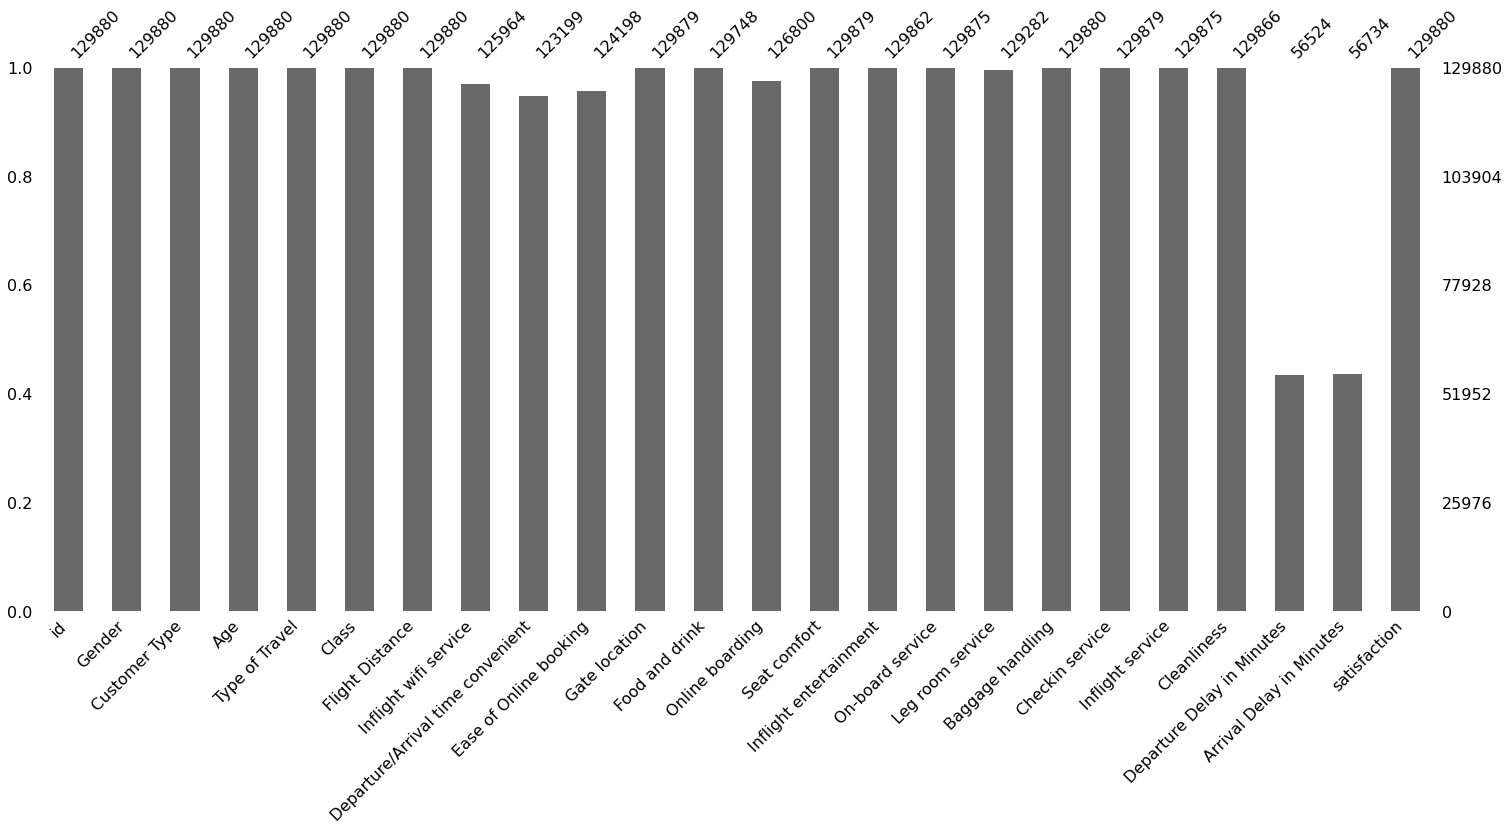

In [78]:
#visualizamos con un barplot
msno.bar(prediction_travel);

vemos los nulos en las variables que faltan representadas en las barras incompletas

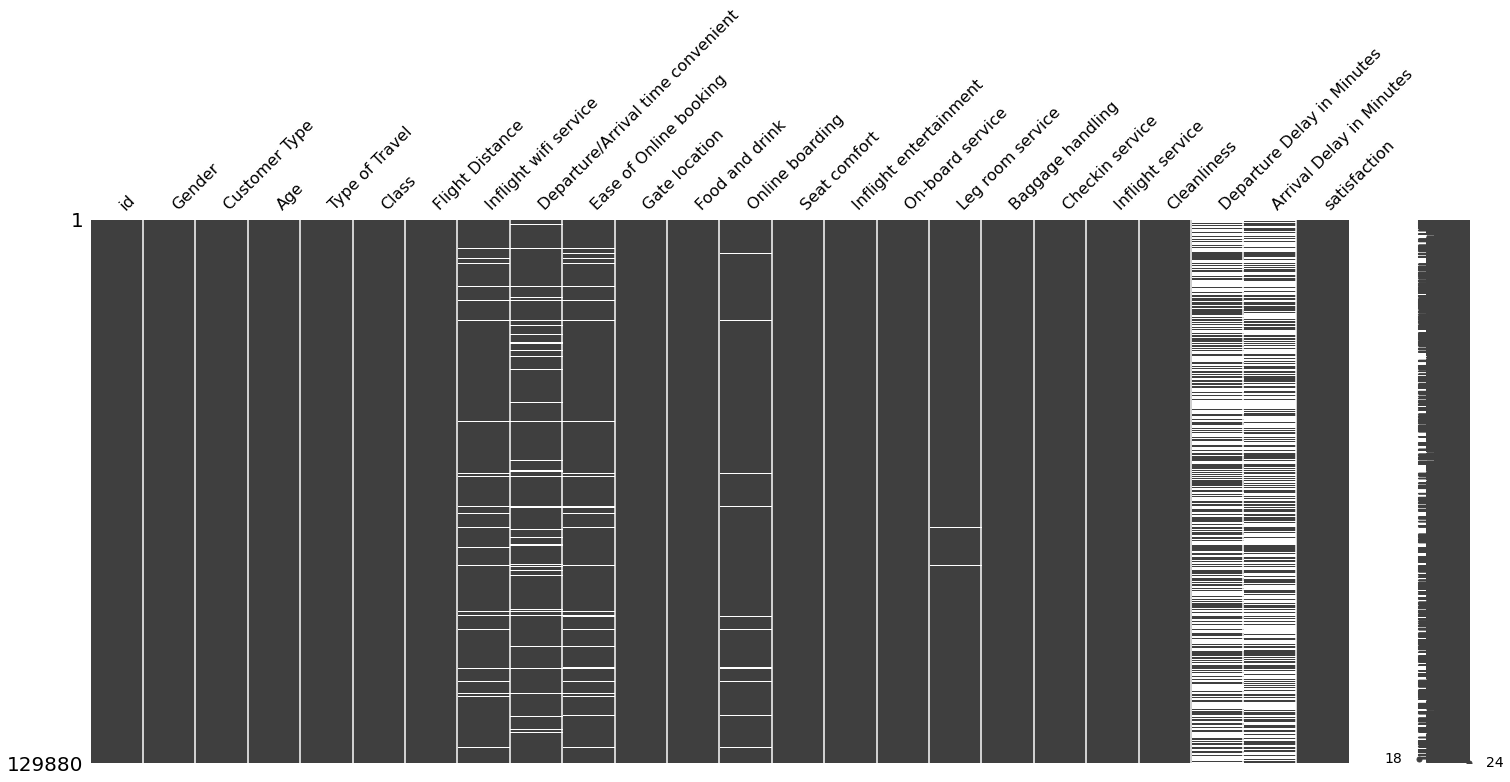

In [79]:
#vamos a observar la distrubucion de los nulos con matrixplot y ver si tienen relacion entre variables
msno.matrix(prediction_travel)

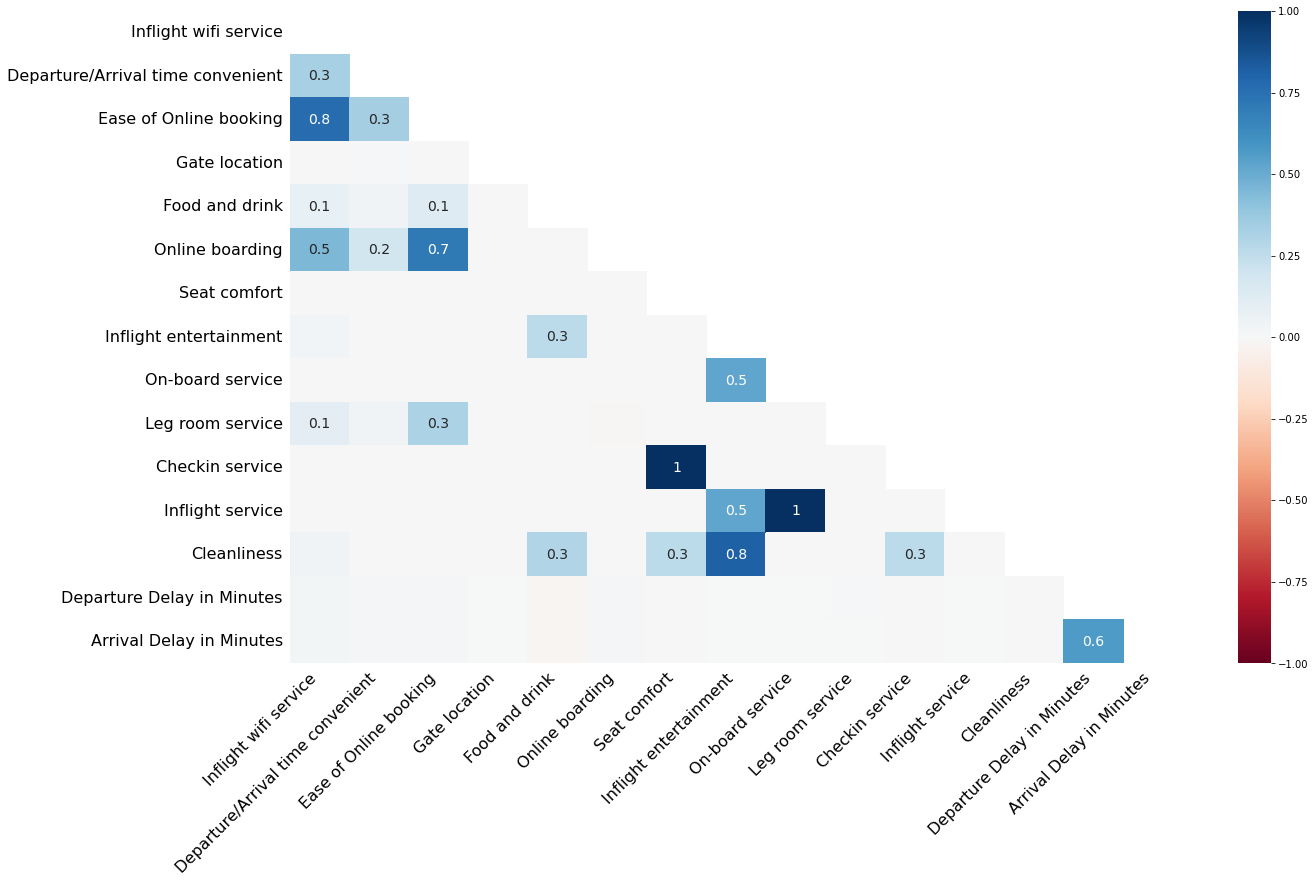

In [80]:
#hacemos un heatmap
msno.heatmap(prediction_travel)

observamos coorrelacion positiva en los nulos de checkin service y seat comfort, tambien en inflight service y On-board service, y otros con un poco menos de coorrelacion.

In [81]:
# LLenamos los nulos con simple imputer

from sklearn.impute import SimpleImputer
from numpy import isnan
df_copy=prediction_travel.copy()


In [82]:
# Creamos un Numpy con los valores

valores = df_copy[["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink",
                   "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
                   "Checkin service","Inflight service","Cleanliness","Departure Delay in Minutes",
                   "Arrival Delay in Minutes"]].values
valores

array([[ 5.,  4.,  3., ...,  5., 50., 44.],
       [ 1.,  1.,  3., ...,  5., nan, nan],
       [ 2., nan,  2., ...,  2., nan, nan],
       ...,
       [ 1.,  1.,  1., ...,  4.,  7., 14.],
       [ 1.,  1.,  1., ...,  1., nan, nan],
       [ 1.,  3.,  3., ...,  1., nan, nan]])

In [83]:
# definir el imputador
imputador = SimpleImputer(missing_values = np.nan, strategy='median')
transformados=imputador.fit_transform(valores)
transformados


array([[ 5.,  4.,  3., ...,  5., 50., 44.],
       [ 1.,  1.,  3., ...,  5., 16., 17.],
       [ 2.,  3.,  2., ...,  2., 16., 17.],
       ...,
       [ 1.,  1.,  1., ...,  4.,  7., 14.],
       [ 1.,  1.,  1., ...,  1., 16., 17.],
       [ 1.,  3.,  3., ...,  1., 16., 17.]])

In [84]:
# Utilizamos el array para generar un nuevo data set

transformados= pd.DataFrame(transformados)
transformados= transformados.rename(columns={0:"Inflight wifi service",1:"Departure/Arrival time convenient",2:"Ease of Online booking",3:"Gate location",4:"Food and drink",
                   5:"Online boarding",6:"Seat comfort",7:"Inflight entertainment",8:"On-board service",9:"Leg room service",
                   10:"Checkin service",11:"Inflight service",12:"Cleanliness",13:"Departure Delay in Minutes",
                   14:"Arrival Delay in Minutes"})
print(transformados.head().round(2))

   Inflight wifi service  Departure/Arrival time convenient  \
0                    5.0                                4.0   
1                    1.0                                1.0   
2                    2.0                                3.0   
3                    3.0                                3.0   
4                    2.0                                3.0   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                     3.0            4.0             3.0              4.0   
1                     3.0            1.0             5.0              4.0   
2                     2.0            4.0             2.0              2.0   
3                     3.0            2.0             3.0              4.0   
4                     4.0            3.0             4.0              1.0   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0           3.0                     5.0               5.0               5.0   


In [85]:
# Eliminamos las columnas con nulos del dataset completo
df_snull=df_copy.dropna(1)
df_snull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                129880 non-null  int64 
 1   Gender            129880 non-null  object
 2   Customer Type     129880 non-null  object
 3   Age               129880 non-null  int64 
 4   Type of Travel    129880 non-null  object
 5   Class             129880 non-null  object
 6   Flight Distance   129880 non-null  int64 
 7   Baggage handling  129880 non-null  int64 
 8   satisfaction      129880 non-null  object
dtypes: int64(4), object(5)
memory usage: 8.9+ MB


<ipython-input-85-d18789bf4984>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_snull=df_copy.dropna(1)


In [86]:
transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Inflight wifi service              129880 non-null  float64
 1   Departure/Arrival time convenient  129880 non-null  float64
 2   Ease of Online booking             129880 non-null  float64
 3   Gate location                      129880 non-null  float64
 4   Food and drink                     129880 non-null  float64
 5   Online boarding                    129880 non-null  float64
 6   Seat comfort                       129880 non-null  float64
 7   Inflight entertainment             129880 non-null  float64
 8   On-board service                   129880 non-null  float64
 9   Leg room service                   129880 non-null  float64
 10  Checkin service                    129880 non-null  float64
 11  Inflight service                   1298

In [87]:
# Creamos un nuevo dataset con la concatenacion de df_snull y transformados

dftravel=pd.concat([df_snull,transformados],axis=1)
dftravel.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Baggage handling,satisfaction,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,satisfied,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,4,satisfied,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,3,neutral or dissatisfied,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,1,satisfied,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,satisfied,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


In [88]:
dftravel.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Baggage handling                     0
satisfaction                         0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [89]:
#renombramos algunas variables que tienen mayusculas y espacios
dftravel= dftravel.rename(columns={'Gender': 'gender'})
dftravel= dftravel.rename(columns={'Customer Type': 'customer_type'})
dftravel= dftravel.rename(columns={'Age': 'age'})
dftravel= dftravel.rename(columns={'Type of Travel': 'type_of_travel'})
dftravel= dftravel.rename(columns={'Class': 't_class'})
dftravel= dftravel.rename(columns={'Flight Distance': 'flight_distance'})
dftravel= dftravel.rename(columns={'Inflight wifi service': 'inflight_wifi_service'})
dftravel= dftravel.rename(columns={'Departure/Arrival time convenient': 'departure_arrival_time_convenient'})
dftravel= dftravel.rename(columns={'Ease of Online booking': 'ease_of_online_booking'})
dftravel= dftravel.rename(columns={'Baggage handling': 'baggage_handling'})
dftravel= dftravel.rename(columns={'Checkin service': 'checkin_service'})
dftravel= dftravel.rename(columns={'Inflight service': 'inflight_service'})
dftravel= dftravel.rename(columns={'Cleanliness': 'cleanliness'})
dftravel= dftravel.rename(columns={'Departure Delay in Minutes': 'departure_delay_in_minutes'})
dftravel= dftravel.rename(columns={'Arrival Delay in Minutes': 'arrival_delay_in_minutes'})
dftravel= dftravel.rename(columns={'Online boarding': 'online_boarding'})
dftravel= dftravel.rename(columns={'On-board service': 'on_board_service'})
dftravel= dftravel.rename(columns={'Leg room service': 'leg_room_service'})
dftravel= dftravel.rename(columns={'Food and drink': 'food_and_drink'})
dftravel= dftravel.rename(columns={'Seat comfort': 'seat_comfort'})
dftravel= dftravel.rename(columns={'Gate location': 'gate_location'})
dftravel= dftravel.rename(columns={'Leg room service': 'leg_room_service'})
dftravel= dftravel.rename(columns={'Inflight entertainment': 'inflight_entertainment'})
dftravel.head()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,satisfied,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,4,satisfied,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,3,neutral or dissatisfied,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,1,satisfied,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,satisfied,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


In [90]:
#verificamos que no hay nulos en el dataset
dftravel.isnull()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
#sumamos los nulos para verificar que no haya
dftravel.isnull().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
t_class                              0
flight_distance                      0
baggage_handling                     0
satisfaction                         0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

# Visualizaciones graficas con matplotlib y seaborn




In [92]:
#Creamos grupos 
satisfaction_group=dftravel.groupby('satisfaction').count()
satisfaction_group


,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,inflight_wifi_service,departure_arrival_time_convenient,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,73452,73452,73452,73452,73452,73452,73452,73452,73452,73452,...,73452,73452,73452,73452,73452,73452,73452,73452,73452,73452
satisfied,56428,56428,56428,56428,56428,56428,56428,56428,56428,56428,...,56428,56428,56428,56428,56428,56428,56428,56428,56428,56428


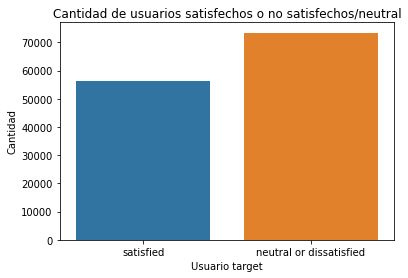

In [93]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(data = dftravel, x = 'satisfaction')
plt.title('Cantidad de usuarios satisfechos o no satisfechos/neutral')
ax.set_xlabel("Usuario target")
ax.set_ylabel("Cantidad");

predominan los usuarios insatisfechos/neutral

In [94]:
dftravel['age'].value_counts()

39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: age, Length: 75, dtype: int64

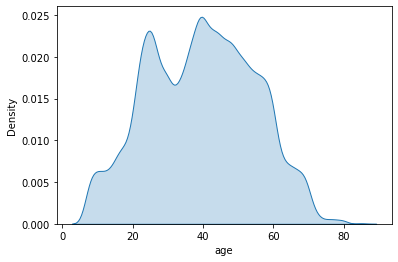

In [95]:
sns.kdeplot(data=dftravel['age'], shade=True);



En el grafico observamos mas respuestas de usuarios en el rango de 20 y 40 años, luego disminuye la cantidad 

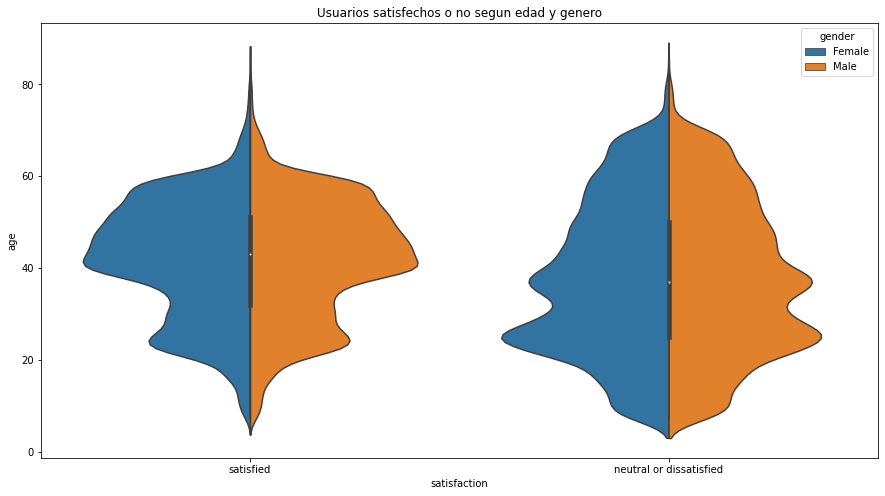

In [96]:
fig,ax1=plt.subplots(figsize=(15,8))
ax1= sns.violinplot(data=dftravel, kind='violin',x='satisfaction', y='age',hue='gender', split=True)
ax1.set_title('Usuarios satisfechos o no segun edad y genero');

no se nota gran diferencia de respuestas entre los dos generos, por edades lo que se visualiza es que mas cerca de los 20 años hay un incremento de neutral/insatisfecho a referencia a los satisfechos, a los 40 esta bastante similar por lo que se ve del grafico


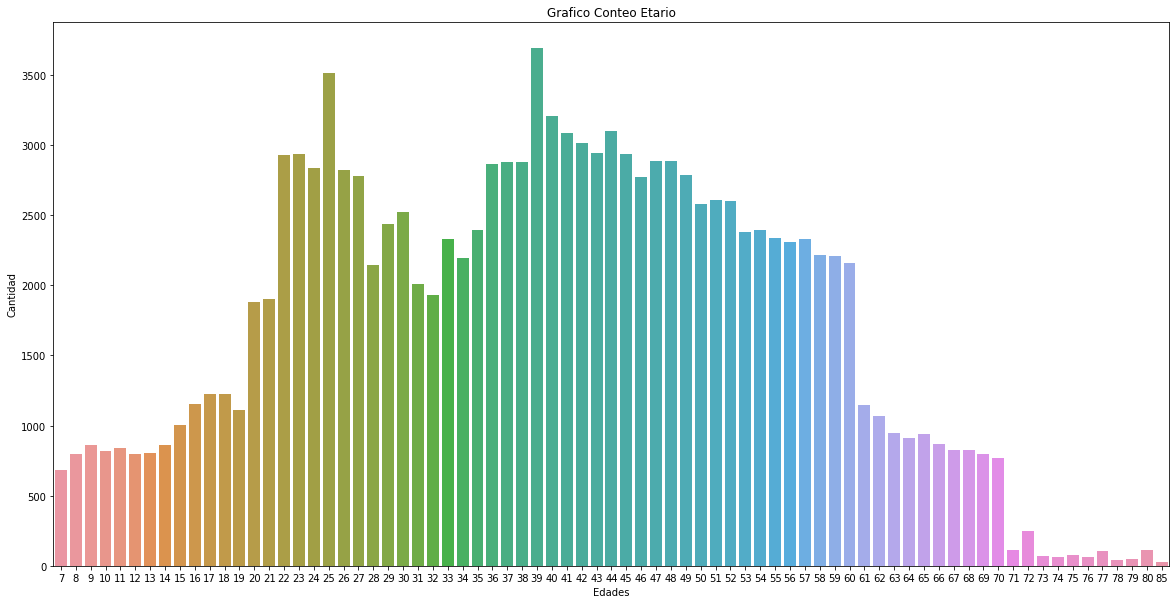

In [97]:

fig , ax = plt.subplots(figsize=(20,10))


ax = sns.countplot(x="age",data=dftravel)

ax.set_title('Grafico Conteo Etario')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad');

Se pueden observar la cantidad de pasajeros por franja etaria. La cantidad de pasajeros es mayor con picos en las edades de 25 y  39 años.

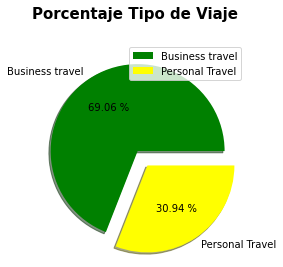

In [98]:
conteo_variable=dftravel['type_of_travel'].value_counts()
etiquetas=dftravel['type_of_travel'].unique()
colores=['green','yellow']
extraccion=0,0.2

fig. ax=plt.subplot()
plt.pie(conteo_variable,labels=etiquetas,
        autopct="%0.2f %%",
        colors=colores,
        explode=extraccion,
        shadow=True)
plt.title('Porcentaje Tipo de Viaje \n',fontsize=15, fontweight='bold')
plt.legend()
plt.show()

Observamos que porcentaje de tipo de viaje es el que eligen mas pasajeros, predominan con un 69.06% de tipo business


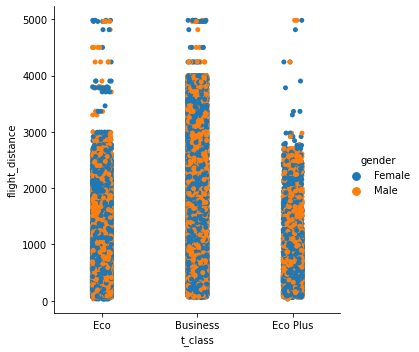

In [99]:
sns.catplot(x='t_class', y='flight_distance', hue='gender', data=dftravel);


en el grafico se visualiza que en la clase business suelen hacer viajes mas viajes dentro de los 0 a 4000 de distancia, mientras la clase eco y eco plus predominan de 0 a 3000 de distancia 

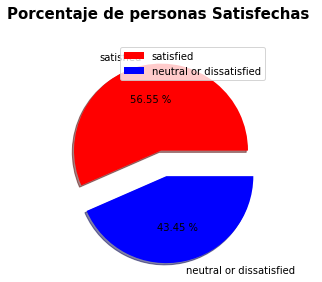

In [100]:
conteo_variable=dftravel['satisfaction'].value_counts()
etiquetas=dftravel['satisfaction'].unique()
colores=['red','blue']
extraccion=0,0.3

fig. ax=plt.subplot()
plt.pie(conteo_variable,labels=etiquetas,
        autopct="%0.2f %%",
        colors=colores,
        explode=extraccion,
        shadow=True)
plt.title('Porcentaje de personas Satisfechas \n',fontsize=15, fontweight='bold')
plt.legend()
plt.show()

En este gráfico se puede observar el porcentaje de pasajeros que estan satisfechos y los que se mantienen neutral o no lo estan. 

In [101]:
#Se visualizan las medidas principales para las distancia de vuelo.
dftravel['flight_distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: flight_distance, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


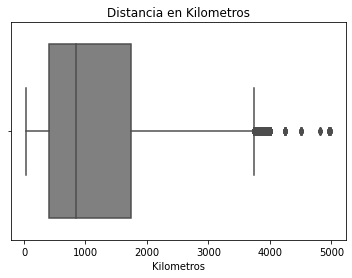

In [102]:
# Se utiliza el gráfico de cajas de modo de comprender mejor las medidas anteriores.
sns.boxplot('flight_distance',data=dftravel,color='grey').set(title='Distancia en Kilometros',xlabel='Kilometros')
plt.show();

# Analisis
objetivo predecir que tipo de usuario puede estar satisfecho segun que clases y datos , o tipos de usuarios pueden llegar a estar mas satisfechos que otros



In [103]:
from ast import In
## Cargamos los packages
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)



In [104]:
dftravel.head()

,id,gender,customer_type,age,type_of_travel,t_class,flight_distance,baggage_handling,satisfaction,inflight_wifi_service,...,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,satisfied,5.0,...,4.0,3.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,4,satisfied,1.0,...,4.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,16.0,17.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,3,neutral or dissatisfied,2.0,...,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,16.0,17.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,1,satisfied,3.0,...,4.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,satisfied,2.0,...,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,16.0,20.0


In [105]:
dftravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   t_class                            129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   baggage_handling                   129880 non-null  int64  
 8   satisfaction                       129880 non-null  object 
 9   inflight_wifi_service              129880 non-null  float64
 10  departure_arrival_time_convenient  129880 non-null  float64
 11  ease_of_online_booking             1298

1. Preguntas que nos surgen:

que diferencia de usuarios estan satisfechos, segun el genero y edad?

In [106]:
#contamos la cantidad de usuarios segun genero y edad 
genero_count= dftravel.groupby('gender')[['satisfaction']].count()
genero_count


,satisfaction
gender,
Female,65899
Male,63981


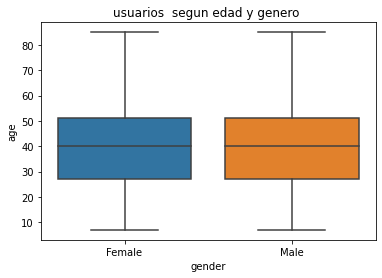

In [107]:

sns.boxplot(x='gender',y='age',data=dftravel);
plt.title("usuarios  segun edad y genero ");




Que cantidad de usuarios estan satisfechos o no segun la clase?

*   List item
*   List item



Text(0, 0.5, 'usuarios')

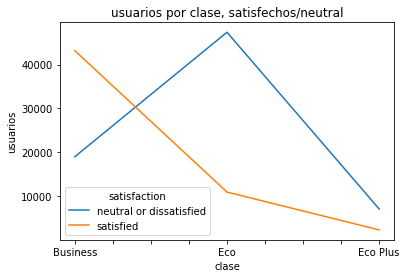

In [108]:
graf1= dftravel.groupby(['t_class', 'satisfaction']) 
ax = graf1.size().unstack().plot()
ax.set_title('usuarios por clase, satisfechos/neutral') 
ax.set_xlabel('clase')
ax.set_ylabel('usuarios')

Cuál es el delay total por pasajero/viaje ? Tiene una relación  con él target?

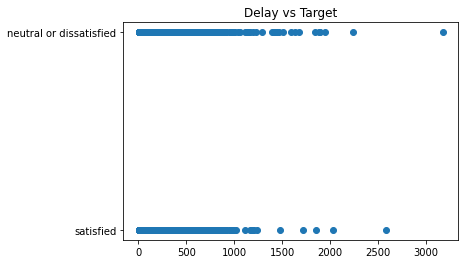

In [109]:
#creamos una nueva variable para sumar el delay total por pasajero
dftravel['delay_t'] = dftravel['departure_delay_in_minutes']+ dftravel ['arrival_delay_in_minutes']
#visualizamos si hay diferencia entre los satifechos o no segun delay total
plt.scatter(dftravel['delay_t'], dftravel['satisfaction'])
plt.title ("Delay vs Target");



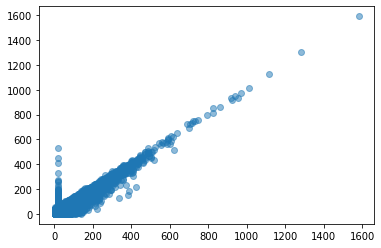

In [110]:
#vemos si hay una relacion entre el delay de llegada y delay salida
plt.scatter(dftravel['arrival_delay_in_minutes'], dftravel['departure_delay_in_minutes'], alpha = 0.5)
pass

vemos si tiene algo que ver la edad con la clase 


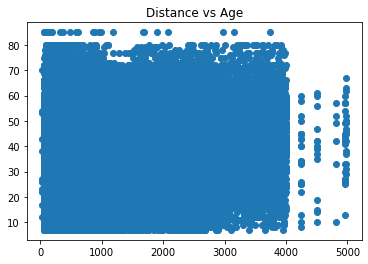

In [111]:
plt.scatter(dftravel['flight_distance'], dftravel['age'])
plt.title ("Distance vs Age");


# Modelado (son solo pruebas)

In [112]:
dftravel.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 't_class',
       'flight_distance', 'baggage_handling', 'satisfaction',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'checkin_service',
       'inflight_service', 'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes', 'delay_t'],
      dtype='object')

In [113]:
model1 = 'age~gender'
lm1 = sm.ols (formula = model1, data= dftravel).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.51
Date:                Sun, 05 Feb 2023   Prob (F-statistic):            0.00119
Time:                        00:08:04   Log-Likelihood:            -5.3704e+05
No. Observations:              129880   AIC:                         1.074e+06
Df Residuals:                  129878   BIC:                         1.074e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.2939      0.059    667.

In [114]:
model2 = 'age~satisfaction + t_class + type_of_travel + flight_distance '
lm2= sm.ols (formula= model2, data= dftravel).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     798.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:08:05   Log-Likelihood:            -5.3508e+05
No. Observations:              129880   AIC:                         1.070e+06
Df Residuals:                  129874   BIC:                         1.070e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc